In [67]:
import time
start_time = time.time()

In [68]:
import pandas as pd
pd.set_option('display.max_rows', 200)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
# from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import seaborn as sns
pd.options.display.float_format = '{:40,.4f}'.format
plt.style.use('ggplot') 
%matplotlib inline

In [143]:
data = pd.read_csv('https://raw.githubusercontent.com/zhuoranliu22/CASA0006/main/Metro_Interstate_Traffic_Volume.csv')
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.2800,0.0000,0.0000,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.3600,0.0000,0.0000,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.5800,0.0000,0.0000,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.1300,0.0000,0.0000,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.1400,0.0000,0.0000,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


holiday Categorical US National holidays plus regional holiday, Minnesota State Fair

temp Numeric Average temp in kelvin

rain_1h Numeric Amount in mm of rain that occurred in the hour

snow_1h Numeric Amount in mm of snow that occurred in the hour

clouds_all Numeric Percentage of cloud cover

weather_main Categorical Short textual description of the current weather

weather_description Categorical Longer textual description of the current weather

date_time DateTime Hour of the data collected in local CST time

traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [71]:
data.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [144]:
data = data.drop(['weather_description','date_time'],axis = 1)

In [145]:
data[['holiday','weather_main']]=data[['holiday','weather_main']].astype('category')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   holiday         48204 non-null  category
 1   temp            48204 non-null  float64 
 2   rain_1h         48204 non-null  float64 
 3   snow_1h         48204 non-null  float64 
 4   clouds_all      48204 non-null  int64   
 5   weather_main    48204 non-null  category
 6   traffic_volume  48204 non-null  int64   
dtypes: category(2), float64(3), int64(2)
memory usage: 1.9 MB


In [34]:
# x1=data['temp']
# x2=data['rain_1h']
# x3=data['snow_1h']
# x4=data['clouds_all']
# y=data['traffic_volume']

In [46]:
# plt.plot(x1, y, label='temp')
# plt.xlabel('temperature')
# plt.ylabel("traffic_volume")

In [76]:
data['holiday'].describe()

count     48204
unique       12
top        None
freq      48143
Name: holiday, dtype: object

In [77]:
data['temp'].describe()

count                                48,204.0000
mean                                    281.2059
std                                      13.3382
min                                       0.0000
25%                                     272.1600
50%                                     282.4500
75%                                     291.8060
max                                     310.0700
Name: temp, dtype: float64

In [78]:
data = data[data['temp']!=0]

In [79]:
data['rain_1h'].describe()

count                                48,194.0000
mean                                      0.3343
std                                      44.7938
min                                       0.0000
25%                                       0.0000
50%                                       0.0000
75%                                       0.0000
max                                   9,831.3000
Name: rain_1h, dtype: float64

In [80]:
data['snow_1h'].describe()

count                                48,194.0000
mean                                      0.0002
std                                       0.0082
min                                       0.0000
25%                                       0.0000
50%                                       0.0000
75%                                       0.0000
max                                       0.5100
Name: snow_1h, dtype: float64

In [81]:
data['clouds_all'].describe()

count                                48,194.0000
mean                                     49.3725
std                                      39.0133
min                                       0.0000
25%                                       1.0000
50%                                      64.0000
75%                                      90.0000
max                                     100.0000
Name: clouds_all, dtype: float64

In [82]:
data['weather_main'].describe()

count      48194
unique        11
top       Clouds
freq       15164
Name: weather_main, dtype: object

In [83]:
data['traffic_volume'].describe()

count                                48,194.0000
mean                                  3,260.2212
std                                   1,986.7604
min                                       0.0000
25%                                   1,194.0000
50%                                   3,380.5000
75%                                   4,933.0000
max                                   7,280.0000
Name: traffic_volume, dtype: float64

In [84]:
df = data.loc[(data['traffic_volume']==0)]
print(df)

      holiday                                     temp  \
25186    None                                 296.6800   
25191    None                                 295.9000   

                                       rain_1h  \
25186                                   0.0000   
25191                                   0.0000   

                                       snow_1h  clouds_all weather_main  \
25186                                   0.0000          40         Rain   
25191                                   0.0000          90         Haze   

       traffic_volume  
25186               0  
25191               0  


In [85]:
data = data[data['traffic_volume']!=0]

In [86]:
summary=data.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
temp,"48,192.0000",281.2600,12.7100,243.3900,272.1800,282.4600,291.8100,310.0700
rain_1h,"48,192.0000",0.3300,44.7900,0.0000,0.0000,0.0000,0.0000,"9,831.3000"
snow_1h,"48,192.0000",0.0000,0.0100,0.0000,0.0000,0.0000,0.0000,0.5100
clouds_all,"48,192.0000",49.3700,39.0100,0.0000,1.0000,64.0000,90.0000,100.0000
traffic_volume,"48,192.0000","3,260.3600","1,986.6900",1.0000,"1,194.0000","3,381.0000","4,933.0000","7,280.0000"


In [141]:
# def filter_outliers(var):
#     q1 = var.quantile(0.25) # calculate the first quartile
#     q3 = var.quantile(0.75) # calculate the third quartile
#     iqr = q3 - q1 # calculate the interquartile range
#     low = q1 - 3*iqr # calculate the lower bound
#     high = q3 + 3*iqr # calculate the upper bound
#     filtered = data[(var > low) & (var < high)] # filter  the values that are within the bounds
#     dropped_observations= len(var)-len(filtered) # calculate the number of observations that were dropped

#     print('Dropped {} observations'.format(dropped_observations))
#     return  filtered

# data=filter_outliers(data['traffic_volume']) # filter outliers from realhrwage
# data=filter_outliers(data['temp'])
# data=filter_outliers(data['rain_1h'])
# data=filter_outliers(data['snow_1h'])
# data=filter_outliers(data['clouds_all'])

Dropped 0 observations
Dropped 0 observations
Dropped 48192 observations
Dropped 0 observations
Dropped 0 observations


The summary statistics table provides us with a good overview of some of the variables we're interested in. However, you'll notice that it omits many of the other variables in our dataset: the categorical ones. This is because calculating the mean, standard deviation, etc. of something like the "occupation" column doesn't really make sense. For that, we turn to visualization.

In [88]:
data['holiday'].unique()

['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day', ..., 'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day', 'Martin Luther King Jr Day']
Length: 12
Categories (12, object): ['Christmas Day', 'Columbus Day', 'Independence Day', 'Labor Day', ..., 'State Fair', 'Thanksgiving Day', 'Veterans Day', 'Washingtons Birthday']

In [91]:
data['weather_main'].unique()

['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', ..., 'Fog', 'Thunderstorm', 'Snow', 'Squall', 'Smoke']
Length: 11
Categories (11, object): ['Clear', 'Clouds', 'Drizzle', 'Fog', ..., 'Smoke', 'Snow', 'Squall', 'Thunderstorm']

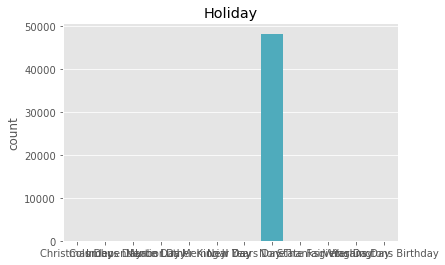

In [95]:
sns.countplot(data=data, x='holiday') # plot the union variable
plt.title('Holiday') # add a title
plt.xlabel('') # remove the x axis label
plt.show() # show the plot     not very informative

In [97]:
print(data['holiday'].value_counts())

None                         48131
Labor Day                        7
Christmas Day                    6
Martin Luther King Jr Day        6
New Years Day                    6
Thanksgiving Day                 6
Columbus Day                     5
Independence Day                 5
Memorial Day                     5
State Fair                       5
Veterans Day                     5
Washingtons Birthday             5
Name: holiday, dtype: int64


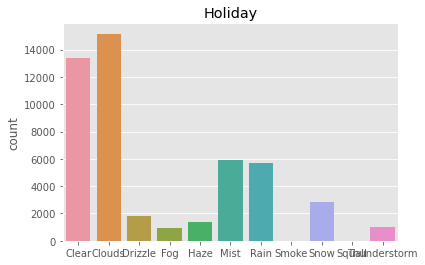

In [94]:
sns.countplot(data=data, x='weather_main') # plot the union variable
plt.title('Weather') # add a title
plt.xlabel('') # remove the x axis label
plt.show() # show the plot

In [98]:
print(data['weather_main'].value_counts())

Clouds          15164
Clear           13381
Mist             5950
Rain             5671
Snow             2876
Drizzle          1821
Haze             1359
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64


In [153]:
data_numeric = pd.get_dummies(data)

In [154]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temp                               48204 non-null  float64
 1   rain_1h                            48204 non-null  float64
 2   snow_1h                            48204 non-null  float64
 3   clouds_all                         48204 non-null  int64  
 4   traffic_volume                     48204 non-null  int64  
 5   holiday_Christmas Day              48204 non-null  uint8  
 6   holiday_Columbus Day               48204 non-null  uint8  
 7   holiday_Independence Day           48204 non-null  uint8  
 8   holiday_Labor Day                  48204 non-null  uint8  
 9   holiday_Martin Luther King Jr Day  48204 non-null  uint8  
 10  holiday_Memorial Day               48204 non-null  uint8  
 11  holiday_New Years Day              48204 non-null  uin

In [155]:
data_final = data_numeric.drop(['weather_main_Clear','holiday_None'],axis = 1)

In [156]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temp                               48204 non-null  float64
 1   rain_1h                            48204 non-null  float64
 2   snow_1h                            48204 non-null  float64
 3   clouds_all                         48204 non-null  int64  
 4   traffic_volume                     48204 non-null  int64  
 5   holiday_Christmas Day              48204 non-null  uint8  
 6   holiday_Columbus Day               48204 non-null  uint8  
 7   holiday_Independence Day           48204 non-null  uint8  
 8   holiday_Labor Day                  48204 non-null  uint8  
 9   holiday_Martin Luther King Jr Day  48204 non-null  uint8  
 10  holiday_Memorial Day               48204 non-null  uint8  
 11  holiday_New Years Day              48204 non-null  uin

# Methodology

In [157]:
data_t = data_final.drop(['rain_1h'],axis = 1)
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temp                               48204 non-null  float64
 1   snow_1h                            48204 non-null  float64
 2   clouds_all                         48204 non-null  int64  
 3   traffic_volume                     48204 non-null  int64  
 4   holiday_Christmas Day              48204 non-null  uint8  
 5   holiday_Columbus Day               48204 non-null  uint8  
 6   holiday_Independence Day           48204 non-null  uint8  
 7   holiday_Labor Day                  48204 non-null  uint8  
 8   holiday_Martin Luther King Jr Day  48204 non-null  uint8  
 9   holiday_Memorial Day               48204 non-null  uint8  
 10  holiday_New Years Day              48204 non-null  uint8  
 11  holiday_State Fair                 48204 non-null  uin

In [158]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(data_t.drop(['traffic_volume'], axis = 1), data_t.traffic_volume, random_state=random_state_split)

In [159]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(36153, 24)
(36153,)
(12051, 24)
(12051,)
True
True


In [160]:
cart_default = DecisionTreeRegressor(random_state=0)
cart_default.fit(train_x, train_y)
# print the tree depth
print("Tree depth: {}".format(cart_default.get_depth()))

Tree depth: 59


In [161]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,50,69,90], 'min_samples_split':[1000,1200,1400,1600,1800]}

randomState_dt = 10000
dt = DecisionTreeRegressor(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(dt, hyperparameters)

clf.fit(train_x, train_y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 1400}
The best score is: 
0.07266196171866161


In [162]:
dt_final = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
dt_final.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=10, min_samples_split=1400, random_state=10000)

In [163]:
print("R2 on the training data:")
print(dt_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(dt_final.score(X=test_x, y=test_y))

R2 on the training data:
0.08173333419154094
R2 on the testing data:
0.07573435920268834
